In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
files.upload()     #https://sipi.usc.edu/database/database.php?volume=misc&image=32#top


99


Text(0.5, 1.0, 'Binary image')

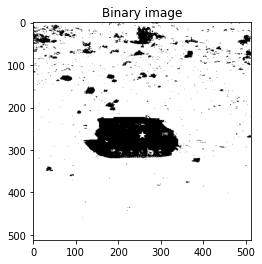

In [110]:
Input_I=plt.imread('APC.tiff') 
width=len(Input_I)
height=len(Input_I[:,0])
his=[0]*256
for i in range (width):
  for j in range (height):
    m=Input_I[i,j]
    his[m]=his[m]+1
inter_vr=[0]*256
U=np.mean(Input_I)
P0=[0]*256
p=[0]*256
P1=[0]*256
U0=[0]*256
U1=[0]*256
for i in range(256):
  p[i]=his[i]/(width*height)
P0[0]=p[0]
U0[0]=0
for t in range(0,255):
  P0[t+1]=P0[t]+p[t+1]
  P1[t+1]=1-P0[t+1]
  if (P0[t+1]==0):
    U0[t+1]=(U0[t]*P0[t]+(t+1)*p[t+1])/(1+P0[t+1])
    U1[t+1]=(U)
  elif (P0[t+1]==1):
    U1[t+1]=(U-U0[t+1]*P0[t+1])/(1+1-P0[t+1])
    U0[t+1]=(U0[t]*P0[t]+(t+1)*p[t+1])
  else:
     U0[t+1]=(U0[t]*P0[t]+(t+1)*p[t+1])/(P0[t+1])
     U1[t+1]=(U-(U0[t+1]*P0[t+1]))/(1-P0[t+1])
  inter_vr[t+1]=P0[t+1]*P1[t+1]*((U0[t+1]-U1[t+1])**2)
c=np.nanargmax(inter_vr)
imgp=np.array(Input_I)
Tr=c
print(Tr)
for i in range(width):
  for j in range(height):
    if (imgp[i,j]>=Tr):
      imgp[i,j]=1
    elif (imgp[i,j]<Tr):
      imgp[i,j]=0  
imgplot=plt.imshow(imgp,cmap='gray')
plt.title('Binary image')

1_1)

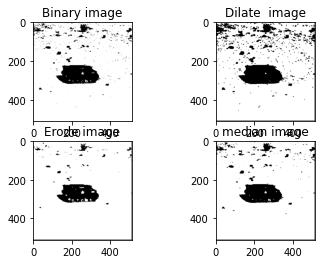

In [111]:
import numpy as np
import matplotlib.pyplot as plt
s=imgp.shape
dil_img=np.zeros((s),int)
ero_img=np.zeros((s),int)
med_img=np.zeros((s),int)
#B=np.array([(0,0,1,0,0),(0,0,1,0,0),(1,1,1,1,1),(0,0,1,0,0),(0,0,1,0,0)])
B=np.array([(1,1,1),(1,1,1),(1,1,1)]) # assign the name the window from above defined windows
c=len(B)
f=B.shape 
row=s[0]+f[0]-1
col=s[1]+f[1]-1
a1=((f[0]-1)/2)
a2=((f[1]-1)/2)
a=np.zeros((row,col),int)
def resize_img(img):
  N=np.zeros((row,col),int)
  for i in range(s[0]):
     for j in range(s[1]):
       N[i+np.int(a1),j+np.int(a2)]=img[i,j]
  N[0,1:513]=img[0,0:512]
  N[-1,1:513]=img[-1,0:512]
  N[1:513,0]=img[0:512,0]
  N[1:513,-1]=img[0:512,-1]
  N[0,0]=N[0,1]
  N[0,-1]=N[0,-2]
  N[-1,0]=N[-1,1]
  N[-1,-1]=N[-2,-1]
  return N
def erode(img):
  N=resize_img(img)
  for i in range(0,s[0]-c+1):
   for j in range(0,s[1]-c+1):
    a=N[i:i+f[0],j:j+f[1]]
    res=np.bitwise_and(a,B)
    output=np.all(res==0) 
    if (output):
        ero_img[i,j]=0
    else:
        ero_img[i,j]=1
  return ero_img
def dilate(img):
  N=resize_img(img)
  for i in range(0,s[0]-c+1):
   for j in range(0,s[1]-c+1):
    a=N[i:i+f[0],j:j+f[1]]
    res=np.bitwise_and(a,B)
    output=np.sum(res) 
    if (output<9):
        dil_img[i,j]=0
    else:
       dil_img[i,j]=1
  return dil_img
def median(img):
  N=resize_img(img)
  for i in range(0,s[0]-c+1):
    for j in range(0,s[1]-c+1):
      a=N[i:i+f[0],j:j+f[1]]
      res=np.bitwise_and(a,B)
      output=np.sum(res) 
      if (output<5):
        med_img[i,j]=0
      else:          
       med_img[i,j]=1
  return med_img
ero_img=erode(imgp)
dil_img=dilate(imgp)
med_img=median(imgp)

plt.subplot(2, 2, 1)
plt.title('Binary image')
imgplot=plt.imshow(imgp,cmap='gray')
plt.subplot(2, 2, 2)
plt.title('Dilate  image')
imgplot=plt.imshow(dil_img,cmap='gray')
plt.subplot(2, 2, 3)
plt.title('Erode image')
imgplot=plt.imshow(ero_img,cmap='gray')
plt.subplot(2, 2, 4)
plt.title('median image')
imgplot=plt.imshow(med_img,cmap='gray')


1_2)

diff b/w the direct dilation and its complement paths: 0
diff b/w the direct erosion and its complement paths: 0
diff b/w the direct median and its complement paths: 0


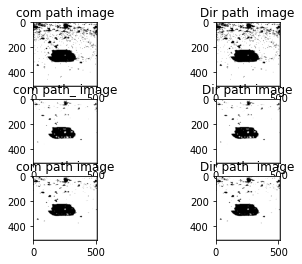

In [128]:

imgp2=np.zeros((s),int)
ero_imgp3=np.zeros((s),int)
dil_imgp3=np.zeros((s),int)
med_imgp3=np.zeros((s),int)
dil_img2=np.zeros((s),int)
ero_img2=np.zeros((s),int)
med_img2=np.zeros((s),int)

imgp2=1-imgp
ero_imgp3=erode(imgp2_com)
dil_imgp3=dilate(imgp2_com)
med_imgp3=median(imgp2_com)
ero_img2=erode(imgp)
dil_img2=dilate(imgp)
med_img2=median(imgp)
z1=dil_imgp3-dil_img2
z2=ero_imgp3-ero_img2
z3=med_imgp3-med_img2
print("diff b/w the direct dilation and its complement paths:",np.count_nonzero(z1))
print("diff b/w the direct erosion and its complement paths:",np.count_nonzero(z2))
print("diff b/w the direct median and its complement paths:",np.count_nonzero(z3))


plt.subplot(3, 2, 1)
plt.title('com path image')
imgplot=plt.imshow(dil_imgp3,cmap='gray')
plt.subplot(3, 2, 2)
plt.title('Dir path  image')
imgplot=plt.imshow(dil_img2,cmap='gray')
plt.subplot(3, 2, 3)
plt.title('com path_ image')
imgplot=plt.imshow(ero_imgp3,cmap='gray')
plt.subplot(3, 2, 4)
plt.title('Dir path image')
imgplot=plt.imshow(ero_img2,cmap='gray')
plt.subplot(3, 2, 5)
plt.title('com path image')
imgplot=plt.imshow(med_imgp3,cmap='gray')
plt.subplot(3, 2, 6)
plt.title('Dir path  image')
imgplot=plt.imshow(med_img2,cmap='gray')


1_3)

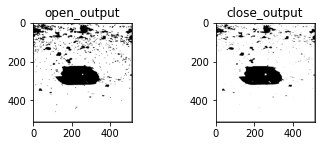

In [81]:
import numpy as np
e=np.zeros((s),int)
d=np.zeros((s),int)
op_output=np.zeros((s),int)
cl_output=np.zeros((s),int)
open_clo=np.zeros((s),int)
clo_open=np.zeros((s),int)
def erode(img):
  N=resize_img(img)
  for i in range(0,s[0]-c+1):
   for j in range(0,s[1]-c+1):
    a=N[i:i+f[0],j:j+f[1]]
    res=np.bitwise_and(a,B)
    output=np.all(res==0) 
    if (output):
        ero_img[i,j]=0
    else:
        ero_img[i,j]=1
  return ero_img

def dilate(img):
  N=resize_img(img)
  for i in range(0,s[0]-c+1):
   for j in range(0,s[1]-c+1):
    a=N[i:i+f[0],j:j+f[1]]
    res=np.bitwise_and(a,B)
    output=np.any(res==0) 
    if (output):
        dil_img[i,j]=0
    else:
       dil_img[i,j]=1
  return dil_img
def open(img):
  e=erode(img)
  op_output=dilate(e)
  return op_output

def close(img):
  d=dilate(img)
  cl_output=erode(d)
  return cl_output

op_output=open(imgp)
cl_output=close(imgp)

plt.subplot(2, 2, 1)
plt.title('open_output')
imgplot=plt.imshow(op_output,cmap='gray')
plt.subplot(2, 2, 2)
plt.title('close_output')
imgplot=plt.imshow(cl_output,cmap='gray')


1_4)

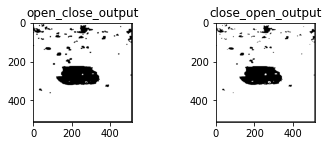

In [95]:
def open_close(img):
  c=close(img)
  open_clo=open(c)
  return open_clo
def close_open(img):
  o=open(img)
  clo_open=close(o)
  return clo_open

open_clo=open_close(imgp)
clo_open=close_open(imgp)

plt.subplot(2, 2, 1)
plt.title('open_close_output')
imgplot=plt.imshow(open_clo,cmap='gray')
plt.subplot(2, 2, 2)
plt.title('close_open_output')
imgplot=plt.imshow(clo_open,cmap='gray')

1_5)

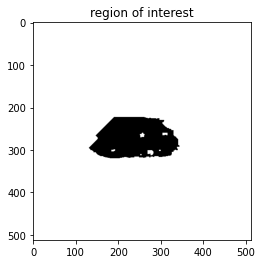

total no of blobs: 182
no of pixels in the region of interest 15586


In [96]:
import numpy as np
import matplotlib.pyplot as plt
k=1
img3=np.array(clo_open)
R=np.zeros((height,width),int)
for i in range(1,height):
  for j in range(1,width):
    if ((img3[i,j]==0) and ((img3[i,j-1]==1) and (img3[i-1,j]==1))):
      R[i,j]=k
      k=k+1
    elif ((img3[i,j]==0) and (img3[i,j-1]==1) and (img3[i-1,j]==0)):
      R[i,j]=R[i-1,j]
    elif ((img3[i,j]==0) and (img3[i,j-1]==0) and (img3[i-1,j]==1)):
      R[i,j]=R[i,j-1]
    elif ((img3[i,j]==0) and (img3[i,j-1]==0) and (img3[i-1,j]==0)):
      R[i,j]=min(R[i-1,j],R[i,j-1])
      R[i-1,j]=R[i,j]
      R[i,j-1]=R[i,j]

#to remove minor blobs
b=[0]*height*width
for i in range(height):
  for j in range(width):
    m=R[i,j]
    b[m]=b[m]+1
lb=0
for i in range(1,len(b)):
  if (b[i]>lb):
    lb=b[i]
    maxlabel=i
for i in range(height):
  for j in range(width):
    if ((clo_open[i,j]==0) and (R[i,j]!=maxlabel)):
      img3[i,j]=1
imgp=plt.imshow(img3,cmap='gray')
plt.title('region of interest')
plt.show()
print("total no of blobs:",k-1) 
print("no of pixels in the region of interest",np.count_nonzero(img3==0))



In [ ]:
from google.colab import files
files.upload()    #https://apod.nasa.gov/apod/image/2106/StonehengeSun_alexander_4200.jpg

Text(0.5, 1.0, ' histogram of original gray_img')

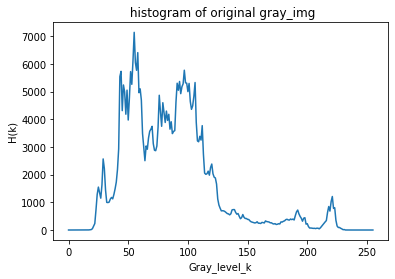

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow      #https://apod.nasa.gov/apod/image/2106/StonehengeSun_alexander_4200.jpg
image=cv2.imread('StonehengeSun_alexander_960.jpg')                       #StonehengeSun_alexander_960.jpg
gray_img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
#cv2_imshow(gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
def histogram_H(Img):
  width=len(Img)
  height=len(Img[:,0])  
  his=[0]*256
  norm_his=[0]*256
  for i in range (width):
    for j in range (height):
     k=np.int(Img[i,j])
     if (k>=255):
       k=255
     elif (k<=0):
       k=0
     else:
       k=k
     his[k]=his[k]+1
  return his
his4=histogram_H(gray_img)
plt.plot(his4)
plt.xlabel('Gray_level_k')
plt.ylabel('H(k)')
plt.title(' histogram of original gray_img') 


2_1 Linear point operations

enter P1 value:2
enter L2 value:60
enter P3 value:0.5
enter L3 value:-5
check at k=100,P1,L1=0: 3975 3975
check at k=100,P2=1,L2: 1734 1734


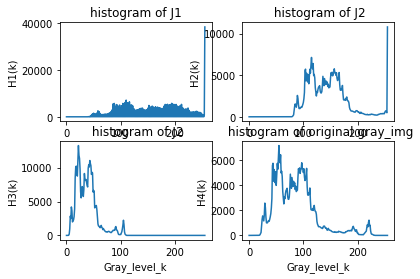

In [ ]:
J1=np.zeros(gray_img.shape,int)
J2=np.zeros(gray_img.shape,int)
J3=np.zeros(gray_img.shape,int)


P1=np.float(input('enter P1 value:'))
L1=0
J1=P1*gray_img+L1
his1=histogram_H(J1)
plt.subplot(2,2,1)
plt.plot(his1)
plt.xlabel('Gray_level_k')
plt.ylabel('H1(k)')
plt.title('histogram of J1')

P2=1
L2=np.float(input('enter L2 value:'))
J2=P2*gray_img+L2 
his2=histogram_H(J2)
plt.subplot(2,2,2)
plt.plot(his2)
plt.xlabel('Gray_level_k')
plt.ylabel('H2(k)')
plt.title(' histogram of J2')

P3=np.float(input('enter P3 value:'))
L3=np.float(input('enter L3 value:'))
J3=P3*gray_img+L3 
his3=histogram_H(J3)
plt.subplot(2,2,3)
plt.plot(his3)
plt.xlabel('Gray_level_k')
plt.ylabel('H3(k)')
plt.title(' histogram of J2')

his4=histogram_H(gray_img)
plt.subplot(2,2,4)
plt.plot(his4)
plt.xlabel('Gray_level_k')
plt.ylabel('H4(k)')
plt.title(' histogram of original gray_img')

print("check at k=100,P1,L1=0:",his1[100],his4[np.int(100/P1)])
print("check at k=100,P2=1,L2:",his2[100],his4[np.int(100-L2)])

#values choosen P1=2,L2=60,P3=0.5,L3=-5

Observation:
The result is verified with by finding the values at gray level k=100. For different values of P,L the modified histogram appears to be scaled and/or shifted version of the original histogram

2_2 FSCS

min pixel val before FSCS : 15
max pixel val before FSCS : 232
min pixel val after FSCS : 0.0
max pixel val after FSCS : 254.99999999999997


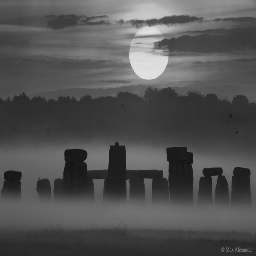

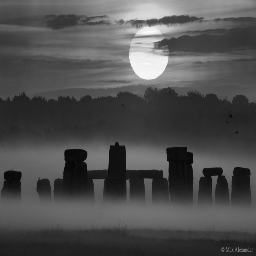

-1

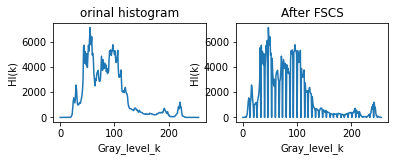

In [ ]:
fscs_img=np.array(gray_img)
A=np.amin(gray_img)
B=np.amax(gray_img)
for n in range(0,20):
  if ((2**n)>=B):
    break
K=(2**n)

P1=((K-1)/(B-A))
L1=(-1)*A*P1

J1=P1*fscs_img+L1 
his1=histogram_H(gray_img)
plt.subplot(2,2,1)
plt.plot(his1)
plt.xlabel('Gray_level_k')
plt.ylabel('HI(k)')
plt.title('orinal histogram')
his2=histogram_H(J1)
plt.subplot(2,2,2)
plt.plot(his2)
plt.xlabel('Gray_level_k')
plt.ylabel('HI(k)')
plt.title('After FSCS')
print("min pixel val before FSCS :",A)
print("max pixel val before FSCS :",B)
print("min pixel val after FSCS :",np.amin(J1))
print("max pixel val after FSCS :",np.amax(J1))

import cv2
gray_img=cv2.resize(gray_img,(256,256))
J1=cv2.resize(J1,(256,256))
cv2_imshow(gray_img)
cv2_imshow(J1)
cv2.waitKey(0)



Observation:
The original gray scale image occupies ( 15 to 232) gray levels, where as after performing FSCS the resultant image histogram occupies (0 to 255)gray levels. Hence it contains all gray levels(0 to 255) are being utilised.

2_3 Log magintude compression

min pixel val before FSCS : 20
max pixel val before FSCS : 229
min pixel val after FSCS : 0.0
max pixel val after FSCS : 255.0


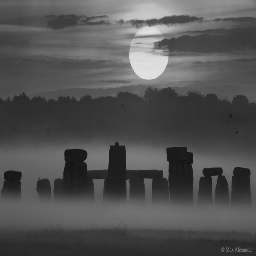

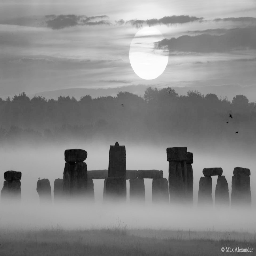

-1

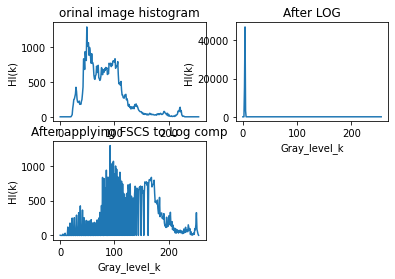

In [ ]:
import numpy as np
I=np.array(gray_img)
J5=np.zeros(gray_img.shape)
J6=np.zeros(gray_img.shape)
J5=np.log(I+1)

fscs_img5=np.array(J5)
A5=np.amin(J5)
B5=np.amax(J5)
K5=256

P5=((K5-1)/(B5-A5))
L5=(-1)*A5*P5
J6=P5*fscs_img5+L5

his1=histogram_H(gray_img)
plt.subplot(2,2,1)
plt.plot(his1)
plt.xlabel('Gray_level_k')
plt.ylabel('HI(k)')
plt.title('orinal image histogram')
his2=histogram_H(J5)
plt.subplot(2,2,2)
plt.plot(his2)
plt.xlabel('Gray_level_k')
plt.ylabel('HI(k)')
plt.title('After LOG')


his3=histogram_H(J6)
plt.subplot(2,2,3)
plt.plot(his3)
plt.xlabel('Gray_level_k')
plt.ylabel('HI(k)')
plt.title('After applying FSCS to Log comp')
print("min pixel val before FSCS :",np.min(gray_img))
print("max pixel val before FSCS :",np.max(gray_img))
print("min pixel val after FSCS :",np.min(J6))
print("max pixel val after FSCS :",np.max(J6))

import cv2
gray_img=cv2.resize(gray_img,(256,256))
#J6=cv2.resize(J6,(256,256))
cv2_imshow(gray_img)
cv2_imshow(J6)
cv2.waitKey(0)



Observation: On applying Log maginitude compression followed by FSCS on original image, the resultant image gives better understanding of low intensity regions.


2_4 Gamma correction 

no of pixels with <255 pixel value in original img: 65536
no of pixels with >255 pixel value in original img: 0
no of pixels with <255 pixel value after gamma correction: 14455
no of pixels with >255 pixel value after gamma correction: 51081


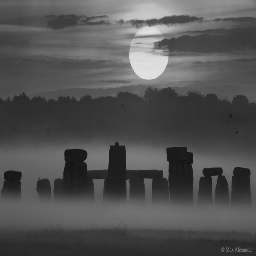

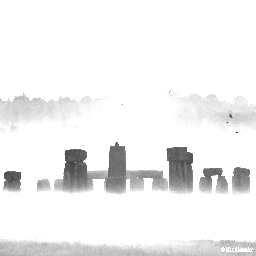

-1

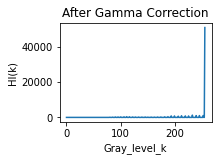

In [ ]:
y=1.4
histogram_H(gray_img)
print("no of pixels with <255 pixel value in original img:",np.count_nonzero(gray_img<255))
print("no of pixels with >255 pixel value in original img:",np.count_nonzero(gray_img>255))
J3=(gray_img)**y
print("no of pixels with <255 pixel value after gamma correction:",np.count_nonzero(J3<255))
print("no of pixels with >255 pixel value after gamma correction:",np.count_nonzero(J3>255))
hisJ3=histogram_H(J3)
plt.subplot(2,2,3)
plt.plot(hisJ3)
plt.xlabel('Gray_level_k')
plt.ylabel('HI(k)')
plt.title('After Gamma Correction')
import cv2
gray_img=cv2.resize(gray_img,(256,256))
J3=cv2.resize(J3,(256,256))
cv2_imshow(gray_img)
cv2_imshow(J3)
cv2.waitKey(0)

**Observation**:
After applying the gamma correction to the original gray scale image,the no of pixels with pixels value>255 is very high, which are clipped to 255 and hence the histogram of J3(after gamma correction) peaks at pixel value 255.Therefore,as there are more no of brighter pixels after Gamma correction, the gamma corrected image looks more brighter in brighter region and more darker in the darker regions of original image

2_5 Histogram flattening

no of bits required per pixel= 8


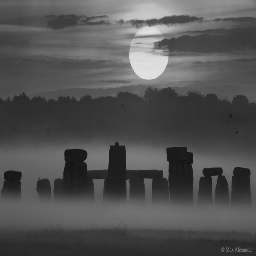

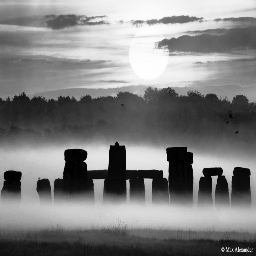

-1

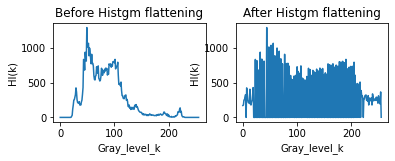

In [129]:

width=len(gray_img)
height=len(gray_img[:,0])  
his1=[0]*256
his2=[0]*256
his3=[0]*256
norm_his1=[0]*256
gray_img2=np.array(gray_img)
gray_img3=np.array(gray_img)

for i in range (width):
  for j in range (height):
    k=gray_img[i,j]
    his1[k]=his1[k]+1
plt.subplot(2,2,1) 
plt.xlabel('Gray_level_k')
plt.ylabel('HI(k)')
plt.title('Before Histgm flattening')
plt.plot(his1)

for l in range(256):
   norm_his1[l]=his1[l]/(height*width)

P1=[0]*256
d=[0]*256
P1[0]=norm_his1[0]

for i in range(1,256):
  P1[i]=P1[i-1]+norm_his1[i]
#plt.subplot(2,2,3) 
#plt.xlabel('Gray_level_k')
#plt.ylabel('HI(k)')
#plt.title('CDF')
#plt.plot(P1)
for i in range(0,256):
  d[i]=np.int((P1[i])*(K-1))

for i in range (width):
  for j in range (height):
    k=gray_img2[i,j]
    gray_img2[i,j]=d[k]

for i in range (width):
  for j in range (height):
    k=gray_img2[i,j]
    his2[k]=his2[k]+1

fscs_input_img2=np.array(gray_img2)
A2=np.amin(gray_img2)
B2=np.amax(gray_img2)
for n in range(0,20):
  if ((2**n)>=B2):
    print("no of bits required per pixel=",n)
    break
K2=(2**n)

P2=((K2-1)/(B2-A2))
L2=(-1)*A2*P2

J2=P2*fscs_input_img2+L2
for i in range (width):
  for j in range (height):
    k=np.int(J2[i,j])
    his3[k]=his3[k]+1
plt.subplot(2,2,2)
plt.xlabel('Gray_level_k')
plt.ylabel('HI(k)')
plt.title('After Histgm flattening')
plt.plot(his3)
for i in range (width):
  for j in range (height):
    k=gray_img[i,j]
    gray_img3[i,j]=his3[k]

import cv2
gray_img=cv2.resize(gray_img,(256,256))
gray_img2=cv2.resize(gray_img2,(256,256))
cv2_imshow(gray_img)
cv2_imshow(gray_img2)
cv2.waitKey(0)


Obesrvation:
After performing histogram flattening,
the image has improved contrast(more brighter) when compared to that of original image and its  histogram also gets flattened when compared to that of original histogram. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
files.upload()


Saving RubinsGalaxy_hst1024.jpg to RubinsGalaxy_hst1024.jpg


{'RubinsGalaxy_hst1024.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00G\x00G\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x01\x01\x01\x01\x03\x02\x02\x02\x02\x03\x03\x04\x04\x03\x03\x03\x03\x04\x04\x06\x05\x04\x04\x05\x04\x03\x03\x05\x07\x05\x05\x06\x06\x06\x06\x06\x04\x05\x07\x07\x07\x06\x07\x06\x06\x06\x06\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x03\x02\x02\x03\x06\x04\x03\x04\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\xff\xc2\x00\x11\x08\x03\x00\x04\x00\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x00\x03\x04\x05\x06\x07\x08\t\xff\xc4\x00\x1c\x01\x00\x03\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x1

5_1)nearest neighbor
checked for
GalaxySkyMirror_Egon_960.jpg,(https://apod.nasa.gov/apod/ap210913.html)
RubinsGalaxy_hst1024.jpg, (https://apod.nasa.gov/apod/ap200125.html)
StonehengeSun_alexander_960.jpg,(https://apod.nasa.gov/apod/ap210620.html)


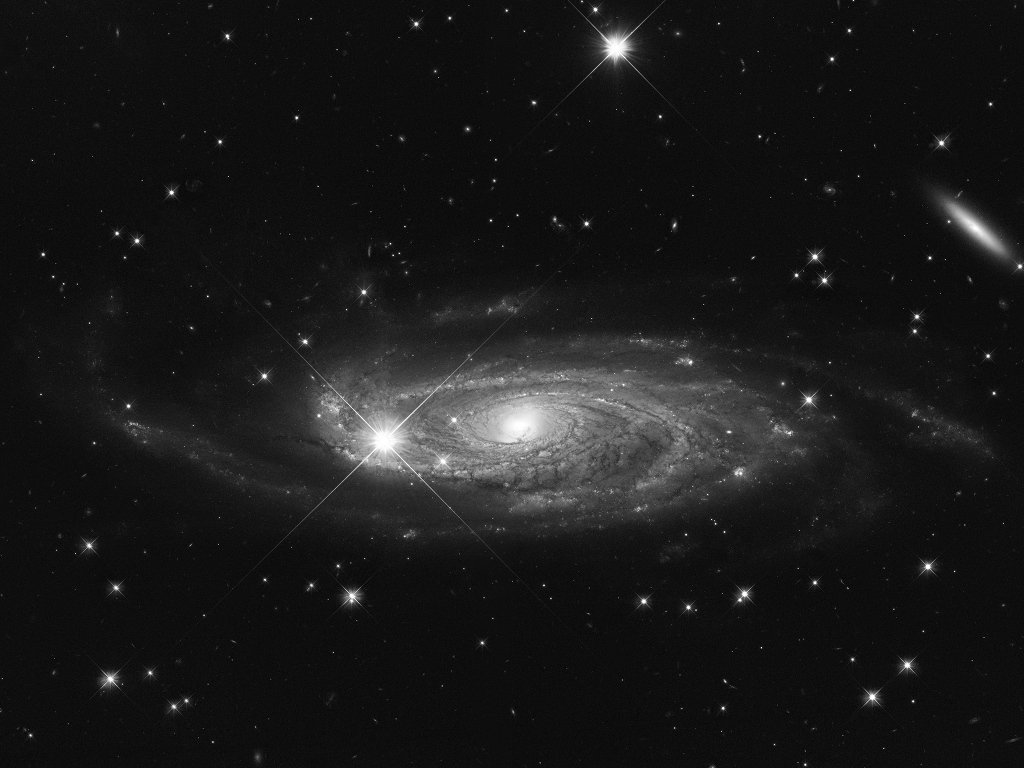

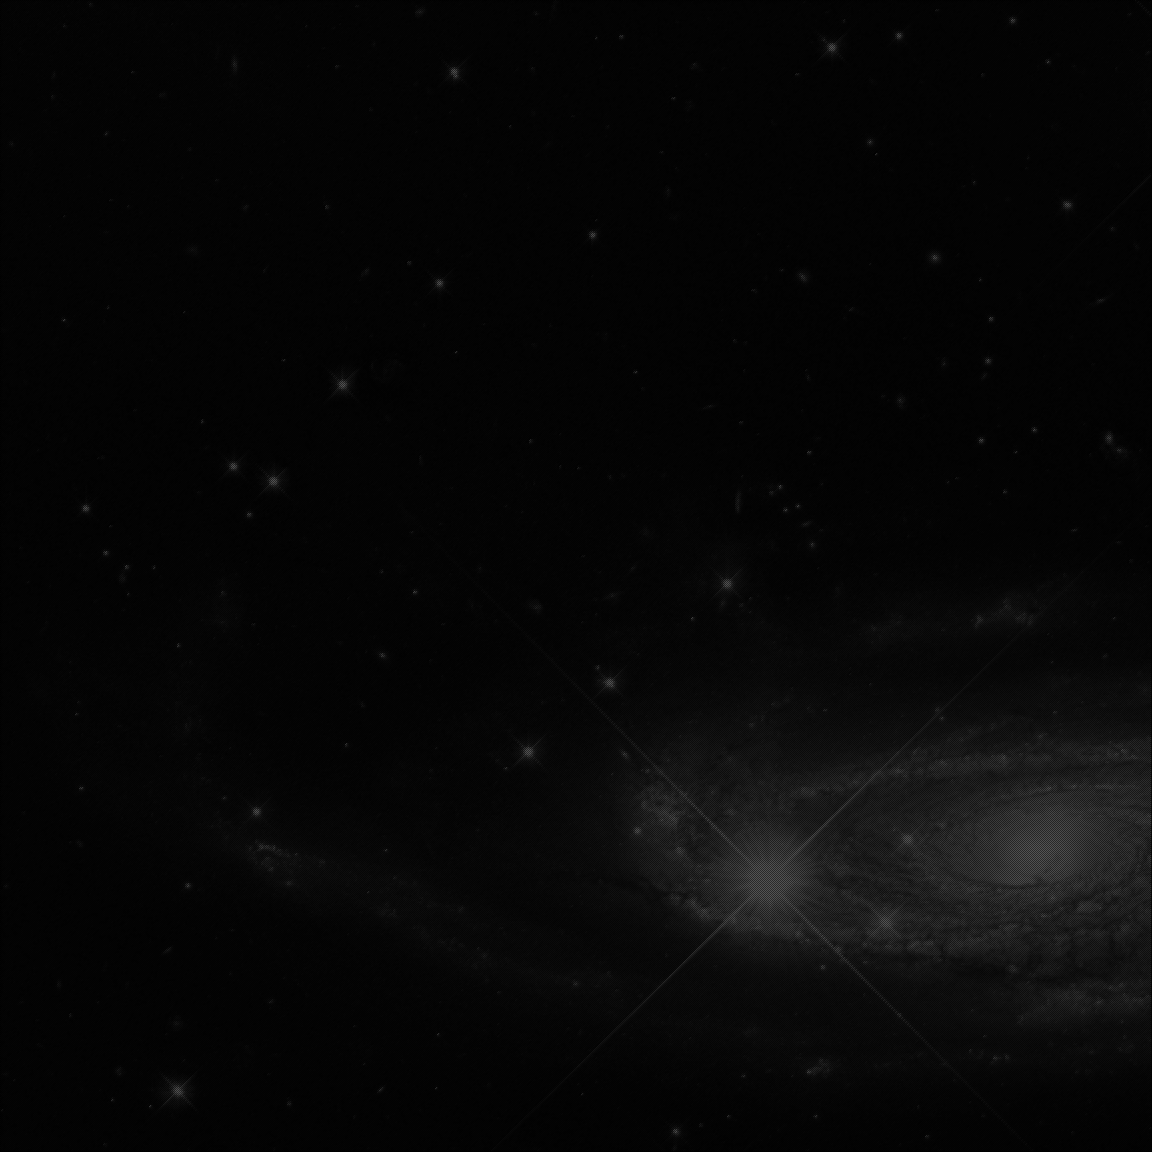

-1

In [131]:

import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow  

Img_I1=cv2.imread('RubinsGalaxy_hst1024.jpg') 
gImg_I1=cv2.cvtColor(Img_I1, cv2.COLOR_BGR2GRAY) 

w1=len(gImg_I1)
h1=len(gImg_I1[:,0])
w2=np.int(np.ceil(w1*1.5))
h2=np.int(np.ceil(h1*1.5))

img=np.zeros((h2,w2),int)
Nw=np.zeros((h2+2,w2+2),int)
for i in range(0,h2,2):
  for j in range(0,w2,2):
    img[i,j]=gImg_I1[np.int(i/2),np.int(j/2)]

for i in range(0,h2):
    for j in range(0,w2):
       Nw[i+1,j+1]=img[i,j]

for i in range(1,h2+1):
  for j in range(1,w2+1):
    d=([Nw[i,j-1],Nw[i,j+1],Nw[i-1,j],Nw[i+1,j]])
    Nw[i,j]=np.mean(d)

for i in range(0,h2):
  for j in range(0,w2):
    img[i,j]=Nw[i+1,j+1]


cv2_imshow(gImg_I1)
cv2_imshow(img)
cv2.waitKey(0)


5_2)Bilinear Interpolation
checked for
GalaxySkyMirror_Egon_960.jpg,(https://apod.nasa.gov/apod/ap210913.html)
RubinsGalaxy_hst1024.jpg, (https://apod.nasa.gov/apod/ap200125.html)

StonehengeSun_alexander_960.jpg,(https://apod.nasa.gov/apod/ap210620.html)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


(1152, 1152)


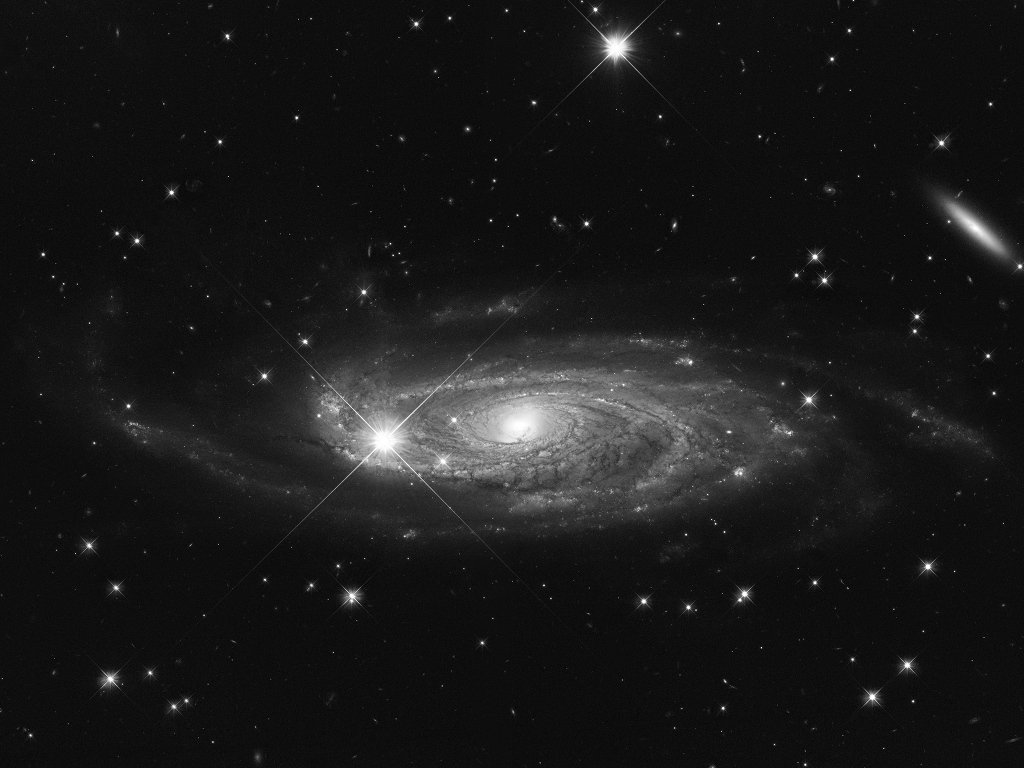

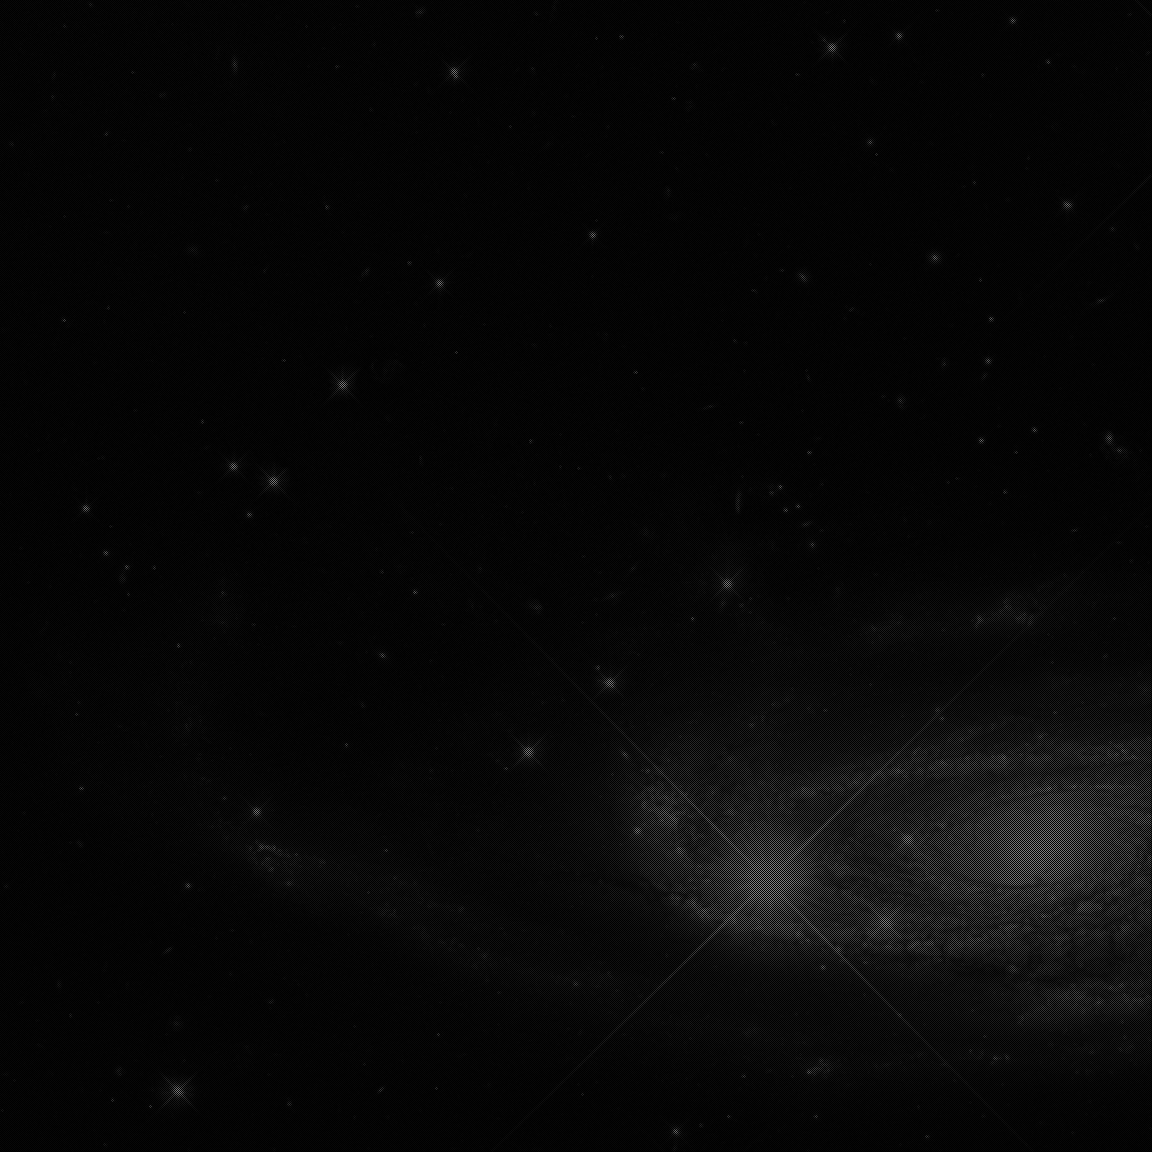

-1

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  

Input_I1=cv2.imread('RubinsGalaxy_hst1024.jpg') 
gInput_I1=cv2.cvtColor(Input_I1, cv2.COLOR_BGR2GRAY)
w1=len(gInput_I1)
h1=len(gInput_I1[:,0])
w2=np.int(np.ceil(w1*1.5))
h2=np.int(np.ceil(h1*1.5))

img=np.zeros((h2,w2),int)
Nw=np.zeros((h2+2,w2+2),int)
for i in range(0,h2,2):
  for j in range(0,w2,2):
    img[i,j]=gInput_I1[np.int(i/2),np.int(j/2)]

for i in range(0,h2):
    for j in range(0,w2):
       Nw[i+1,j+1]=img[i,j]
BImg=np.zeros((h2,w2),float)
for i in range(1,h2+1):
  for j in range(1,w2+1):
    d=([Nw[i,j-1],Nw[i,j+1],Nw[i-1,j],Nw[i+1,j]])
    P=np.array([[1,i,j-1,(i*(j-1))],[1,i,j+1,(i*(j+1))],[1,i-1,j,((i-1)*j)],[1,i+1,j,((i+1)*j)]])
    X=(np.linalg.lstsq(P,d))
    A=X[0][0]
    B=X[0][1]
    C=X[0][2]
    D=X[0][3]
    k=(A+B*i+C*j+D*(i*j))
    BImg[i-1,j-1]=np.int(np.ceil(k))
print(BImg.shape)
#gImg_I1=cv2.resize(gImg_I1,(256,256))
#img=cv2.resize(img,(256,256))
cv2_imshow(gInput_I1)
cv2_imshow(BImg)
cv2.waitKey(0)

  


The Zoomed version of the image obtained from the Bilinear Interpolation has better contrast when compared to that of the zoomed version of image using the nearest neighbour pixel values.Computational complexity is high in case of Bilinear interpolation when compared to nearest neighbour zooming algorithm